In [99]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

# Config

In [16]:
case = r"Mahurangi-2023-11-27"
n_criteria = 3
quantiles = [10, 50, 90]
home_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis"
color = ["#bcbcbc", "#3388b6", "#ff993e"]
mpl.rcParams['axes.prop_cycle'] = cycler(color=color)

# Load and plot evaluation metrics values

In [23]:
input_dir = os.path.join(home_dir, "4_GLUE_postrun", "results", case)
output_dir = os.path.join(home_dir, "5_post_analysis", "results", "GLUEpost",case)
if not os.path.exists(output_dir):
   os.makedirs(output_dir)

senario_names = ['KGE on Flow', 'KGE on Flow + KGE on Soil Moisture', 'KGE on Flow + Seasonal Timing on Soil Moisture']
senario_short_names = ['Reference', 'SM magnitude', 'SM timings']

## Load evaluation results

In [17]:
for i in range(1, n_criteria+1):
    _eval_results = pd.read_csv(os.path.join(input_dir, f'criteria_{i}', 'post_evaluations.csv'), index_col=0)
    _eval_results['criteria_id'] = i
    if i==1:
        eval_results = _eval_results
    else:
        eval_results = pd.concat([eval_results, _eval_results])

eval_results

,NSE on Flow,NSE on Soil,KGE on Flow,KGE on Soil,SeasonTrans of Soil dry2wet_start,SeasonTrans of Soil dry2wet_end,SeasonTrans of Soil wet2dry_start,SeasonTrans of Soil wet2dry_end,KGE on Flow_Behavioral,GLUE_results_Behavioral,criteria_id,KGE on Soil_Behavioral,SeasonTrans of Soil wet2dry_end_Behavioral
run_id,,,,,,,,,,,,,
3,0.615195,0.670707,0.801641,0.677744,11.727277,24.439303,10.890460,10.890460,True,True,1,NaN,NaN
10,0.697722,-0.756497,0.844934,0.619965,9.988937,55.825296,11.077225,11.077225,True,True,1,NaN,NaN
12,0.459752,-7.897395,0.596002,0.347422,11.783946,24.382634,10.244634,10.244634,True,True,1,NaN,NaN
17,0.549650,0.638339,0.639691,0.649191,19.489041,65.322461,10.872111,10.872111,True,True,1,NaN,NaN
23,0.664196,0.725383,0.699050,0.670995,11.610926,24.553418,11.742394,11.742394,True,True,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,0.524631,-0.142919,0.721855,0.646387,11.809489,24.357091,10.626296,10.626296,True,True,3,NaN,True
9953,0.636398,-3.063572,0.810623,0.517951,11.696829,24.469751,10.591743,10.591743,True,True,3,NaN,True
9962,0.729790,-6.952418,0.817519,0.239288,11.384516,24.782064,23.669913,19.667388,True,True,3,NaN,True


In [12]:
eval_results.groupby("criteria_id").count()["GLUE_results_Behavioral"]

criteria_id
1    923
2    468
3    879
Name: GLUE_results_Behavioral, dtype: int64

In [34]:
data_np = eval_results['SeasonTrans of Soil dry2wet_start'].copy().values
x = np.sort(data_np)

array([115.21067528, 101.55596275, 101.55596275, ...,   7.18900862,
         7.18900862,   7.18900862])

## Plot evaluation results

stop
stop
stop


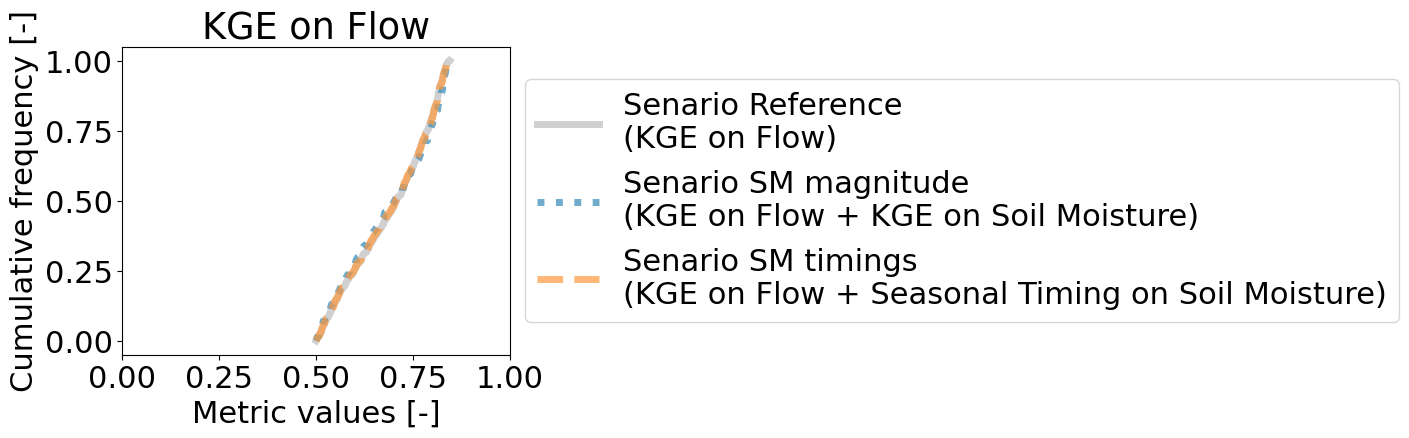

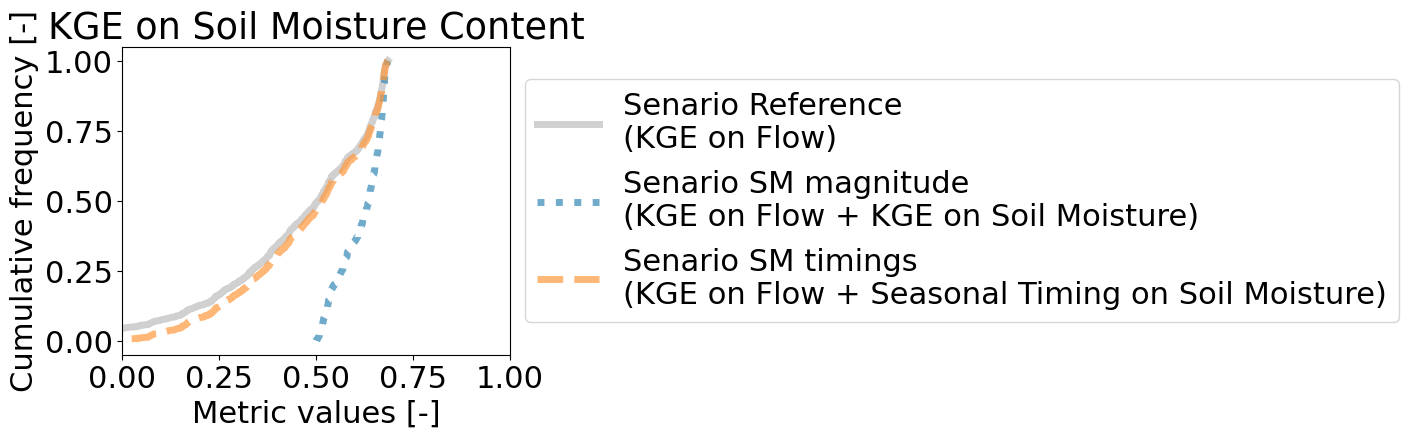

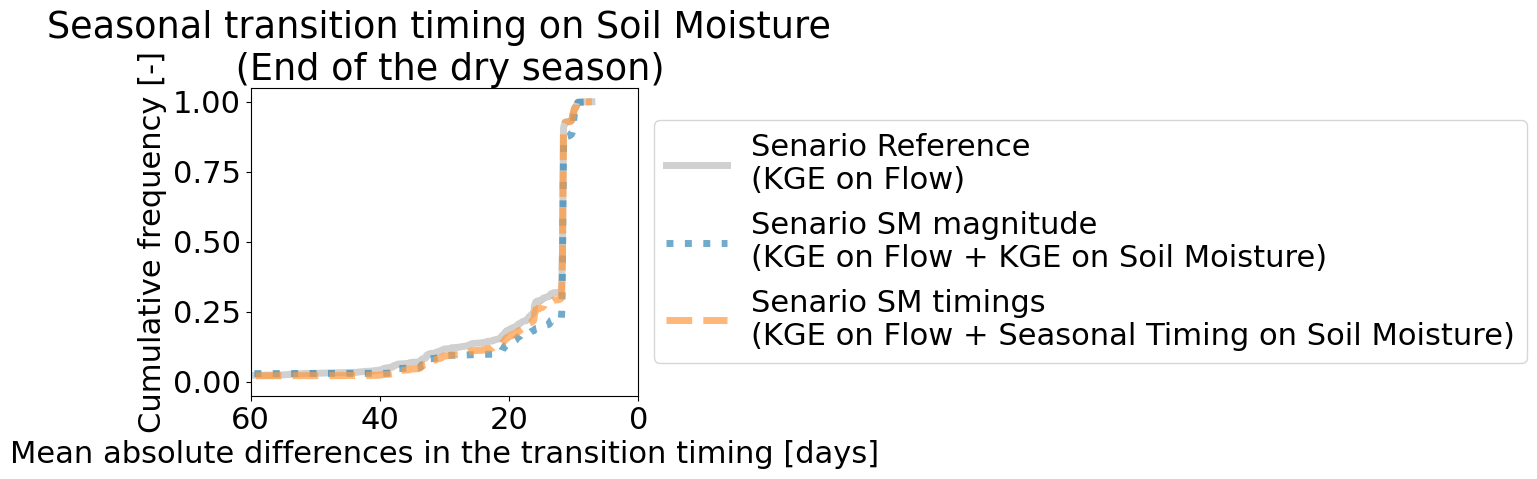

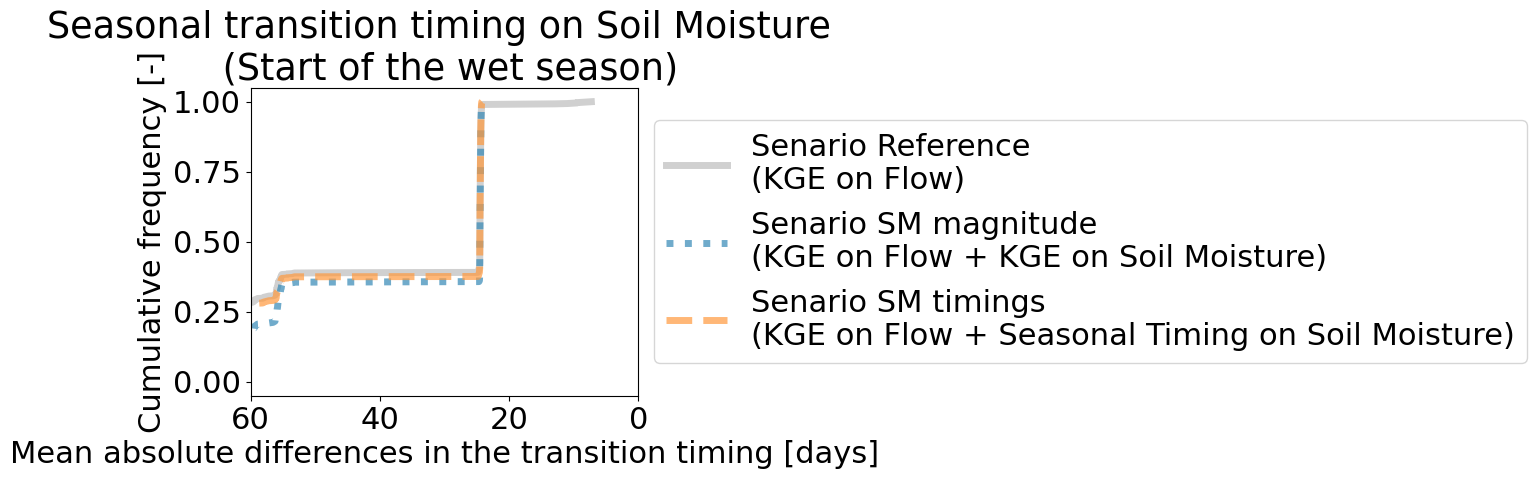

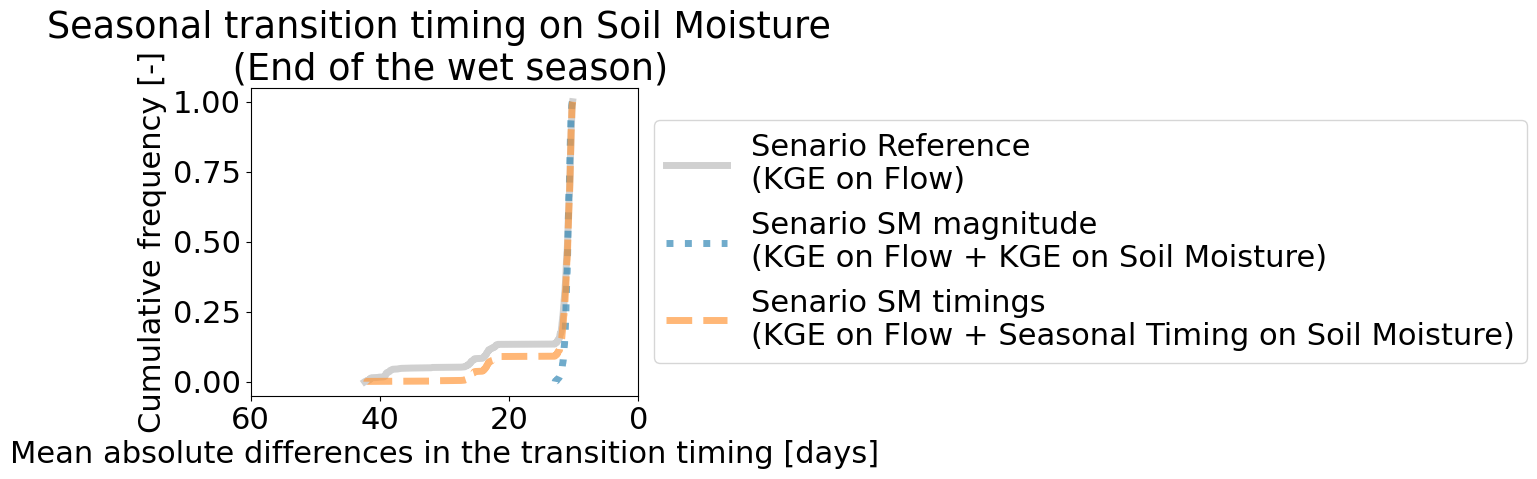

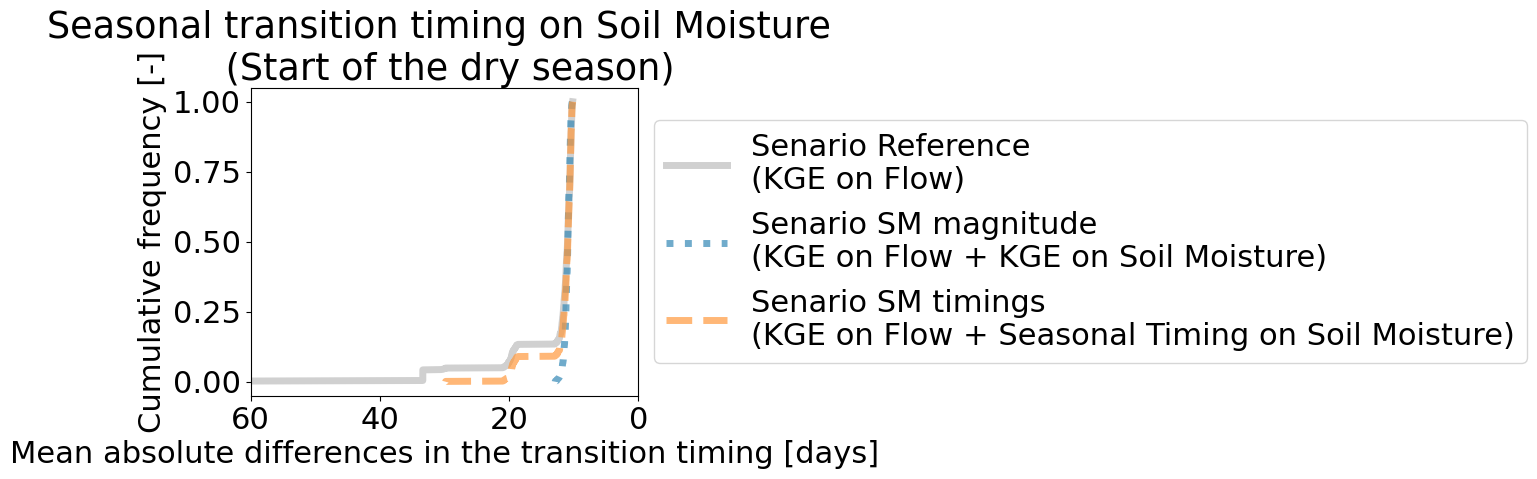

In [41]:
# Create a mapping between fig_title and eval_results_names
title_to_columnname = {
    'KGE on Flow': 'KGE on Flow',
    'KGE on Soil Moisture Content': 'KGE on Soil',
    'Seasonal transition timing on Soil Moisture \n (End of the dry season)': 'SeasonTrans of Soil dry2wet_start',
    'Seasonal transition timing on Soil Moisture \n (Start of the wet season)': 'SeasonTrans of Soil dry2wet_end',
    'Seasonal transition timing on Soil Moisture \n (End of the wet season)': 'SeasonTrans of Soil wet2dry_start',
    'Seasonal transition timing on Soil Moisture \n (Start of the dry season)': 'SeasonTrans of Soil wet2dry_end'
}

# Iterate over the metrics
for title, column_name in title_to_columnname.items():
    fig, ax = plt.subplots(figsize=(5, 4))
    plt.rc('font', size=22)

    # Iterate over criteria
    for i in range(1, n_criteria+1):
        data = eval_results[eval_results['criteria_id'] == i].copy()
        data_np = data[column_name].values

        #sort data
        x = np.sort(data_np)
        
        if 'SeasonTrans' in column_name:
            x = x[::-1]

        #calculate CDF values
        y = 1. * np.arange(len(x)) / (len(x) - 1)
        
        #plot CDF
        if i == 1:
            linestyle='-'
        elif i== 2:
            linestyle=':'
        elif i==3:
            linestyle = '--'

        if column_name ==  'SeasonTrans of Soil dry2wet_start':
            print("stop")
        ax.plot(x, y, label=f"Senario {senario_short_names[i-1]}\n({senario_names[i-1]})", linewidth=5, alpha=0.7, linestyle=linestyle)
        
    if 'SeasonTrans' in column_name:
        ax.set_xlim([0, 60])
        ax.set_xlabel('Mean absolute differences in the transition timing [days]')
        ax.invert_xaxis()
    else:
        ax.set_xlabel('Metric values [-]')
        ax.set_xlim([0, 1])
    ax.set_title(title)
    ax.set_ylabel('Cumulative frequency [-]')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.savefig(os.path.join(output_dir, f'CDF_{column_name}.pdf'), dpi=600, bbox_inches='tight')


## Load monthly evaluation metrics

In [57]:
for i in range(1, n_criteria+1):
    _eval_results_monthly = pd.read_csv(os.path.join(input_dir, f'criteria_{i}', 'post_evaluations_monthly_metrics.csv'), index_col=0)
    _eval_results_monthly.index = pd.to_datetime(_eval_results_monthly.Time, format="%Y-%m-%d")
    _eval_results_monthly['criteria_id'] = i
    _eval_results_monthly['Month'] = _eval_results_monthly.index.month
    if i==1:
        eval_results_monthly = _eval_results_monthly
    else:
        eval_results_monthly = pd.concat([eval_results_monthly, _eval_results_monthly])

In [58]:
eval_results_monthly['Q_mean_bias'] = eval_results_monthly['Q_mean_sim'] - eval_results_monthly['Q_mean_obs']
eval_results_monthly['high_flow_freq_bias'] = eval_results_monthly['high_flow_freq_sim'] - eval_results_monthly['high_flow_freq_obs']
eval_results_monthly['RR_bias'] = eval_results_monthly['RR_sim'] - eval_results_monthly['RR_obs']
eval_results_monthly

,Time,Q_mean_obs,Q_mean_sim,high_flow_freq_obs,high_flow_freq_sim,RR_obs,RR_sim,criteria_id,Month,Q_mean_bias,high_flow_freq_bias,RR_bias
Time,,,,,,,,,,,,
2015-08-31,2015-08-31,NaN,NaN,0.000000,0.000000,NaN,NaN,1,8,NaN,0.000000,NaN
2015-09-30,2015-09-30,0.020054,0.019765,0.000000,0.000000,0.149257,0.147100,1,9,-0.000290,0.000000,-0.002157
2015-10-31,2015-10-31,0.038229,0.075335,0.000000,0.032258,0.180686,0.356065,1,10,0.037106,0.032258,0.175379
2015-11-30,2015-11-30,0.076052,0.134481,0.000000,0.066667,0.268777,0.475272,1,11,0.058429,0.066667,0.206495
2015-12-31,2015-12-31,0.302375,0.307750,0.290323,0.354839,0.539374,0.548961,1,12,0.005374,0.064516,0.009587
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-28,2018-02-28,0.137944,0.196935,0.071429,0.107143,0.395834,0.565108,3,2,0.058991,0.035714,0.169275
2018-03-31,2018-03-31,0.103635,0.099280,0.000000,0.000000,0.832705,0.797710,3,3,-0.004355,0.000000,-0.034995
2018-04-30,2018-04-30,0.096229,0.090517,0.000000,0.066667,0.456465,0.429368,3,4,-0.005712,0.066667,-0.027097


## Plot monthly evaluation metrics

In [59]:
# Assuming senario_short_names and senario_names are defined elsewhere in your code

# Initialize the legend_names list with two '_Hidden' entries
legend_names = ['_Hidden', '_Hidden']

# Loop to generate the rest of the legend names
for i in range(1, 8 * 3 + 1):
    q, r = divmod(i, 8)
    # Append scenario names every 8th iteration, else append '_Hidden'
    if r == 0:
        legend_names.append(f"Senario {senario_short_names[q-1]}\n({senario_names[q-1]})")
    else:
        legend_names.append('_Hidden')

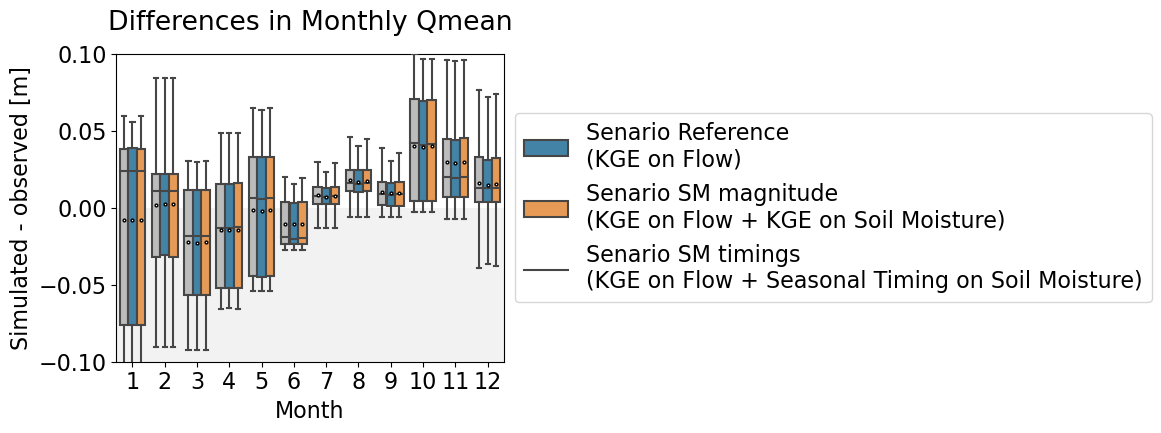

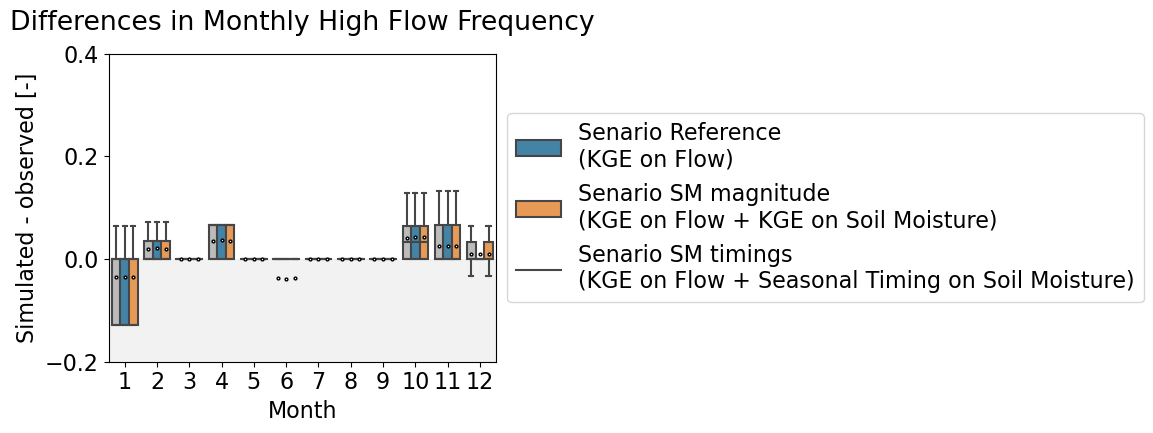

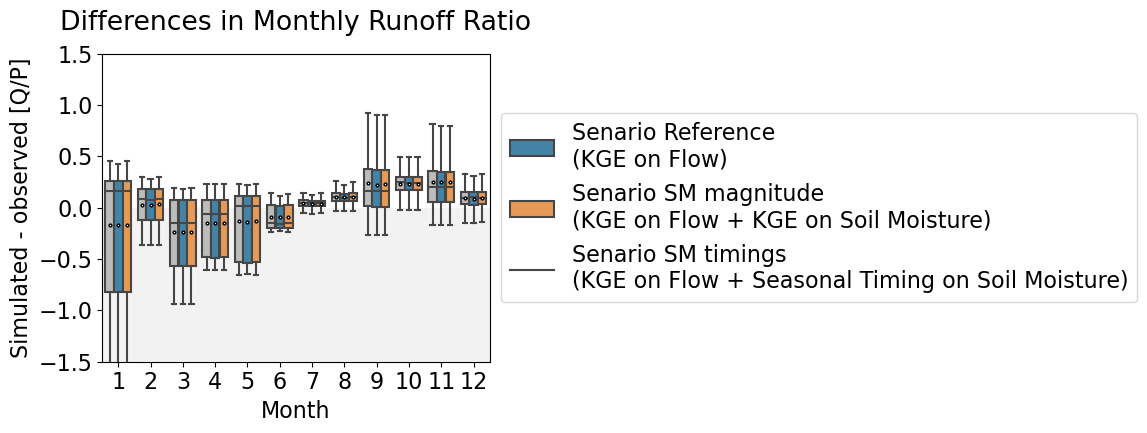

In [61]:
plot_config = {
    'Q_mean_bias': {
        'title': 'Differences in Monthly Qmean',
        'ylabel': 'Simulated - observed [m]',
        'ymin': -0.1,
        'ymax': 0.1
    },
    'high_flow_freq_bias': {
        'title': 'Differences in Monthly High Flow Frequency',
        'ylabel': 'Simulated - observed [-]',
        'ymin': -0.2,
        'ymax': 0.4
    },
    'RR_bias': {
        'title': 'Differences in Monthly Runoff Ratio',
        'ylabel': 'Simulated - observed [Q/P]',
        'ymin': -1.5,
        'ymax': 1.5
    }
}

# Subset of eval_results_monthly
criteria_ids = [1, 2, 3]
subset_eval_results_monthly = eval_results_monthly[eval_results_monthly['criteria_id'].isin(criteria_ids)]

# Iterate over the plot configurations
for metric, config in plot_config.items():
    plt.figure(figsize=(5, 4))
    plt.rc('font', size=16)

    # Create boxplot
    boxplot = sns.boxplot(x='Month', y=metric, data=subset_eval_results_monthly, hue='criteria_id', showfliers=False, zorder=10, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"2"})
    boxplot.set_ylim([config['ymin'], config['ymax']])
    boxplot.set_ylabel(config['ylabel'])
    
    plt.legend(legend_names, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.axhspan(ymin=-10, ymax=0, facecolor='gray', alpha=0.1, zorder=-1)
    plt.title(config['title'], y=1.05)

    # Save the figure
    fig = boxplot.get_figure()
    fig.savefig(os.path.join(output_dir, f'MonthlyBoxPlot_{metric}.pdf'), bbox_inches='tight')

# Load and plot timeseries data

## Load quantiles    

In [76]:
def read_quantile_data(var_name):
    for i in range(1, n_criteria+1):
        _df = pd.read_csv(os.path.join(input_dir, f'criteria_{i}', f'quantiles_{var_name}.csv'), index_col=0, parse_dates=True)
        _df['criteria_id'] = i
        if i==1:
            df = _df
        else:
            df = pd.concat([df, _df])
    return df

In [77]:
results_quantile_Q = read_quantile_data("Q")
results_quantile_SM = read_quantile_data("SM")

In [72]:
site_name = case.split('-')[0]
if site_name == "Coweeta":
    obs_file_name = "test_daily_2014_2018_sm_basinavg.csv"
elif site_name == "Mahurangi":
    obs_file_name = "test_daily_1998_2001_sm_basinavg.csv"

obs = pd.read_csv(os.path.join(home_dir, "data", site_name, obs_file_name))
obs["Time"] = pd.to_datetime(obs["Time"], format="%Y-%m-%d")
obs.set_axis(obs["Time"], axis=0, inplace=True)
obs

,Time,Flow,Rainfall,Soil Moisture Content,Direct Runoff,GIUH Runoff,Lateral Flow,Base Flow,Total Discharge,Timestep
Time,,,,,,,,,,
2015-08-04,2015-08-04,0.000548,0.000254,0.153545,0,0,0,0,66.294,276
2015-08-05,2015-08-05,0.000595,0.000000,0.151452,0,0,0,0,72.009,277
2015-08-06,2015-08-06,0.000765,0.005080,0.164292,0,0,0,0,92.583,278
2015-08-07,2015-08-07,0.000680,0.000762,0.164678,0,0,0,0,82.296,279
2015-08-08,2015-08-08,0.000614,0.000000,0.159843,0,0,0,0,74.295,280
...,...,...,...,...,...,...,...,...,...,...
2018-05-30,2018-05-30,0.020725,0.071886,0.366092,0,0,0,0,2507.742,1306
2018-05-31,2018-05-31,0.013933,0.000762,0.339694,0,0,0,0,1685.925,1307
2018-06-01,2018-06-01,0.010599,0.002540,0.325503,0,0,0,0,1282.446,1308


## Plot quantiles

In [96]:
# Flow Plot
if site_name == "Mahurangi":
    ylim_flow = [1E-10, 1]
    ylim_sm = [0, 0.6]
elif site_name == "Coweeta":
    ylim_flow =  [1E-4, 1E-1]
    ylim_sm = [0, 0.5]

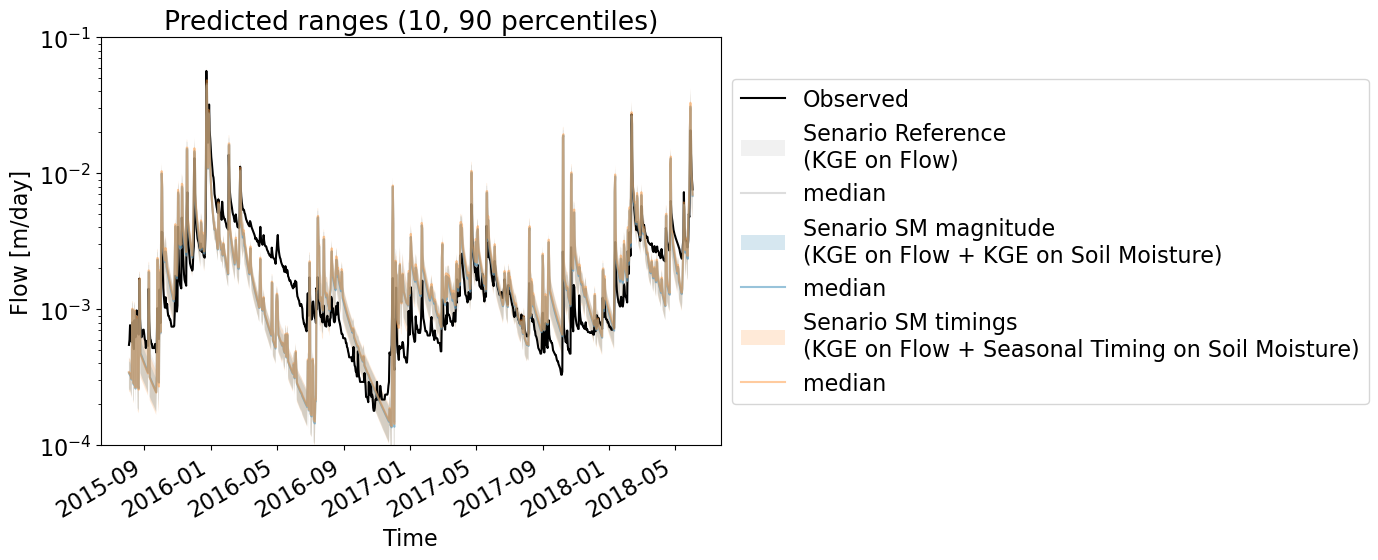

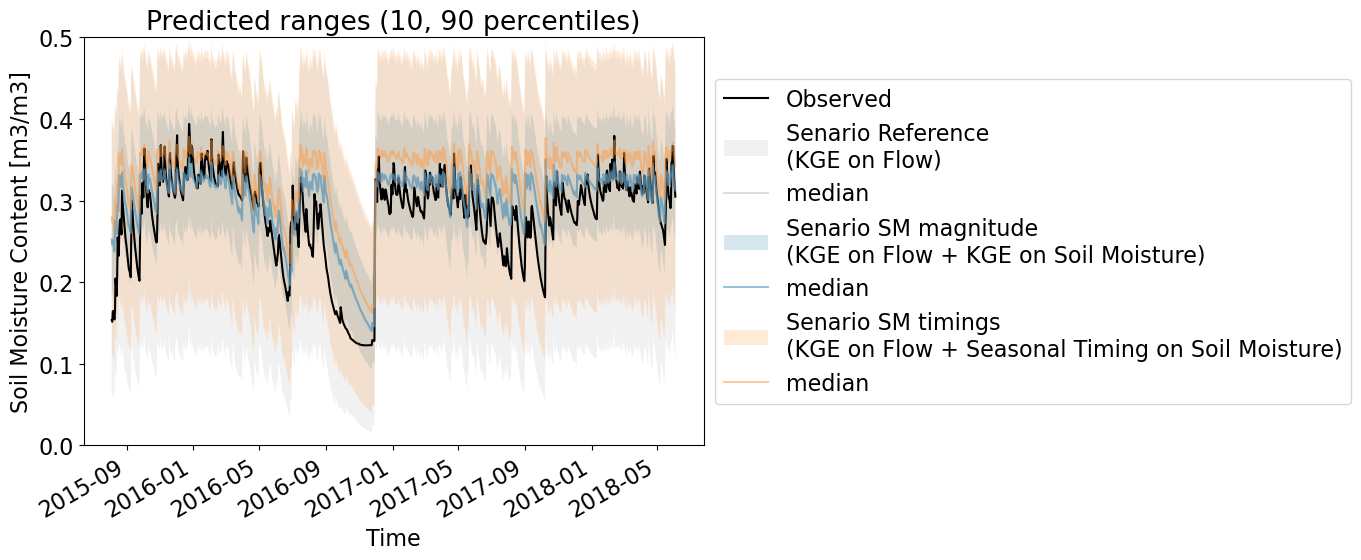

In [92]:
def plot_time_series(data, obs_data, var_name, ylim, file_name):
    plot_title = f'Predicted ranges ({quantiles[0]}, {quantiles[-1]} percentiles)'

    f = plt.figure(figsize=(8, 6))
    ax = f.add_subplot()
    ax.plot(obs_data["Time"], obs_data[var_name], color='k', label='Observed')
    
    for i in range(1, n_criteria+1):
        df_simrange = data[data['criteria_id'] == i].copy()
        plt.fill_between(df_simrange.index, df_simrange['upperlim'], df_simrange['lowerlim'], facecolor=color[i-1], alpha=0.2, interpolate=True, label=f"Senario {senario_short_names[i-1]}\n({senario_names[i-1]})")
        df_simrange['median'].plot(color=color[i-1], alpha=0.5, ax=ax)
        
    ax.set_ylim(ylim)
    ax.set_xlabel('Time')
    if var_name == "Flow":
        ylabel =  'Flow [m/day]'
    elif var_name == "Soil Moisture Content":
        ylabel = "Soil Moisture Content [m3/m3]"
    ax.set_ylabel(ylabel)
    if var_name == "Flow":
        ax.set_yscale('log')
    ax.set_title(plot_title)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    f.autofmt_xdate()
    f.savefig(os.path.join(output_dir, file_name), dpi=600)


plot_time_series(results_quantile_Q, obs, "Flow", ylim_flow, 'timeseries_Q.png')
plot_time_series(results_quantile_SM, obs, "Soil Moisture Content", ylim_sm, 'timeseries_SM.png')


## Plot quantiles in FDC

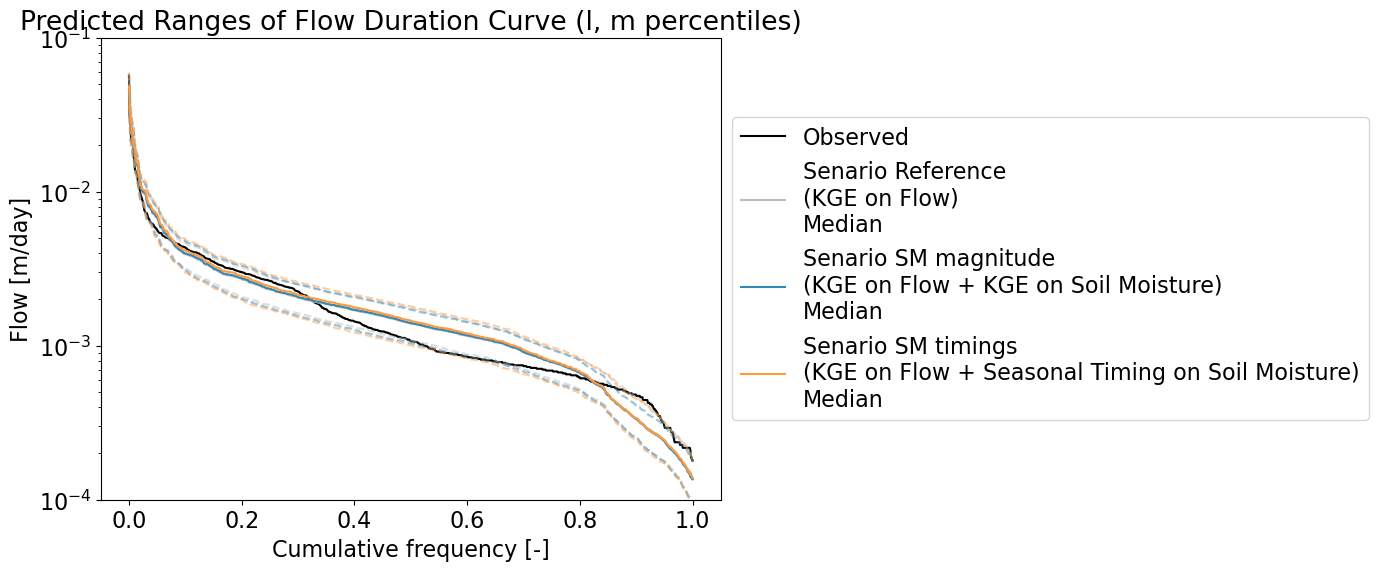

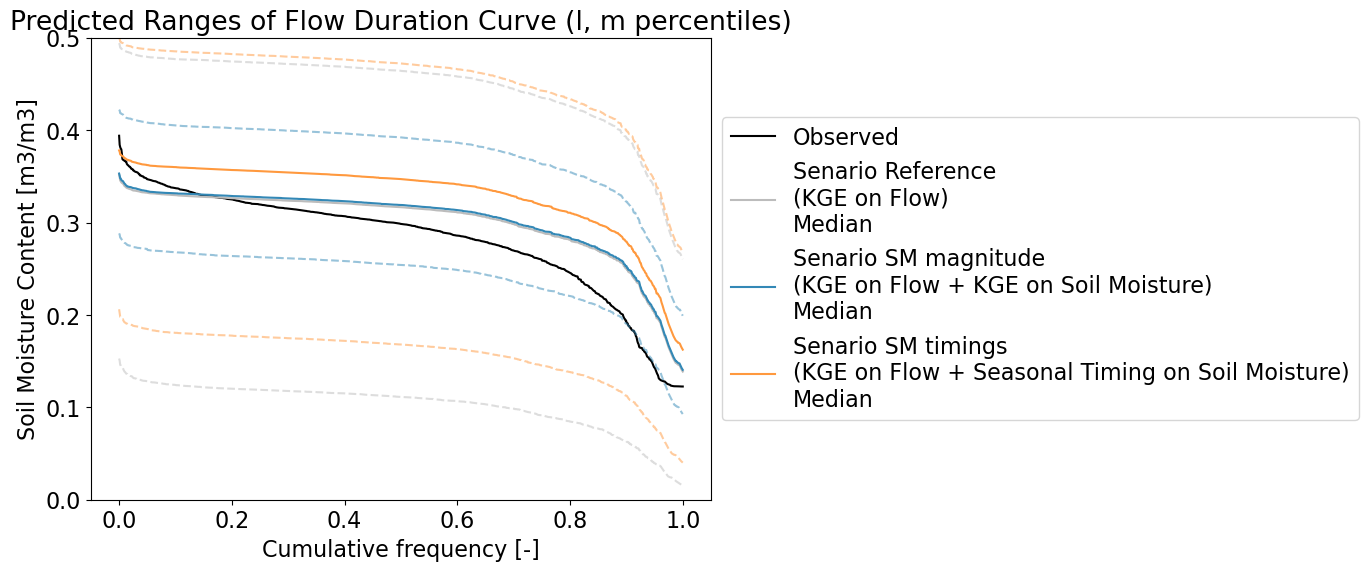

In [98]:
def plot_fdc(data, obs_data, var_name, ylim, file_name):
    f = plt.figure(figsize=(8, 6))
    ax = f.add_subplot()

    # Observed data plot
    obs_fdc_x = np.sort(obs_data[var_name].values)[::-1]
    obs_fdc_y = np.arange(len(obs_fdc_x)) / (len(obs_fdc_x) - 1)
    ax.plot(obs_fdc_y, obs_fdc_x, color='k', label='Observed')

    # Scenario plots
    for i in range(1, n_criteria+1):
        df_simrange = data[data['criteria_id'] == i].copy()

        for quantile in ['median', 'upperlim', 'lowerlim']:
            fdc_x = np.sort(df_simrange[quantile].values)[::-1]
            fdc_y = np.arange(len(fdc_x)) / (len(fdc_x) - 1)
            if quantile == 'median':
                ax.plot(fdc_y, fdc_x, color=color[i-1], label=f"Senario {senario_short_names[i-1]}\n({senario_names[i-1]})\nMedian")
            else:
                ax.plot(fdc_y, fdc_x, color=color[i-1], alpha=0.5, linestyle='--', label='_Hidden')

    if var_name == "Flow":
        ylabel =  'Flow [m/day]'
    elif var_name == "Soil Moisture Content":
        ylabel = "Soil Moisture Content [m3/m3]"
    ax.set_ylabel(ylabel)
    if var_name == "Flow":
        ax.set_yscale('log')

    ax.set_ylim(ylim)
    ax.set_xlabel('Cumulative frequency [-]')
    ax.set_ylabel(ylabel)
    title = f'Predicted Ranges of Flow Duration Curve ({quantile[0]}, {quantile[-1]} percentiles)'
    ax.set_title(title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    f.savefig(os.path.join(output_dir, file_name), dpi=600, bbox_inches='tight')

# Assuming that the necessary data and variables (like senario_short_names, senario_names, results_quantile_Q, results_quantile_SM, obs, and output_dir) are defined

# Flow Duration Curve Plot
plot_fdc(results_quantile_Q, obs, 'Flow', ylim_flow, 'FDC_Q.png')

# Soil Moisture Cumulative Frequency Curve Plot
plot_fdc(results_quantile_SM, obs, 'Soil Moisture Content', ylim_sm, 'FDC_SM.png')
